In [4]:
import numpy as np
import pandas as pd

# 1. 输入数据
# 假设我们有一个包含2017年到2023年的数据 DataFrame，每一列是一个指标，每一行是一个年份的值
data = {
    '人均体育场地面积': [2.00, 2.00, 2.00, 2.00, 3.00, 3.00, 3.00],
    '人均拥有公共图书馆藏量': [1.38, 1.50, 1.61, 1.53, 1.62, 1.76, 1.85],
    '人均文化事业费': [104.91, 116.57, 136.57, 131.70, 160.35, 170.64, 185.20],
    '城镇人均居民可支配收入': [51261.00, 55574.00, 60182.00, 62699.00, 68487.00, 71268.00, 74997.00],
    '城镇居民人均文教娱乐现金消费支出': [3521.00, 3684.00, 4342.00, 3450.00, 4537.00, 4238.00, 5298.00],
    '农村人均居民可支配收入': [24956.00, 27302.00, 29876.00, 31930.00, 35247.00, 37565.00, 40311.00],
    '农村居民人均文教娱乐现金消费支出': [1591.00, 1788.00, 2226.00, 1776.00, 2204.00, 2121.00, 2689.00],
    '剧场影院数': [650.00, 725.00, 755.00, 737.00, 810.00, 845.00, 843.00],
    '艺术表演场馆演映出场次': [11.69, 9.49, 12.21, 5.90, 9.80, 11.94, 3.35],
    '艺术表演团体演出场次': [37.05, 37.87, 37.54, 20.38, 26.51, 19.30, 26.19],
    '电影放映场次': [774.00, 932.00, 1023.00, 70.00, 925.00, 504.58, 861.00],
    '专利数量': [213805.00, 284592.00, 285325.00, 391700.00, 465468.00, 443985.00, 381835.00],
    'R&D 经费投人': [1266.30, 1445.70, 1669.80, 1859.90, 2157.70, 2416.77, 2640.19],
    '科协系统科技学术活动数': [4291.00, 4095.00, 12490.00, 11704.00, 13806.00, 13806.00, 28889.00],
    '文化馆(站)举办展览数': [13514.00, 14903.00, 17739.00, 15656.00, 19118.00, 24570.00, 47999.00],
    '文化馆(站)组织文艺活动数': [91936.00, 115327.00, 148863.00, 122326.00, 148356.00, 314596.00, 716390.00],
    '文化馆(站)培训人次数': [4400.00, 5284.00, 6291.00, 5025.00, 8110.00, 10946.00, 19402.00],
    '公共图书馆举办展览数': [2618.00, 3818.00, 3519.00, 3623.00, 4741.00, 7852.00, 10245.00],
    '公共图书馆组织各类讲座数': [5258.00, 5587.00, 7415.00, 5693.00, 6583.00, 11270.00, 15551.00]
}

# 转换为DataFrame
df = pd.DataFrame(data)

# 2. 数据标准化（Min-Max Scaling）
df_norm = (df - df.min()) / (df.max() - df.min())

# 3. 计算每个指标的熵值
# 计算每列的概率分布
p = df_norm / df_norm.sum(axis=0)

# 计算熵值
k = 1 / np.log(len(df))  # 常数
entropy = -k * (p * np.log(p)).sum(axis=0)

# 4. 计算权重
# 熵值越大，信息越少，权重越小
# 计算权重
d = 1 - entropy  # 信息效用
weight = d / d.sum()  # 标准化权重

# 输出每个指标的权重
weight_df = pd.DataFrame(weight, index=df.columns, columns=['权重'])
print(weight_df)


                        权重
人均体育场地面积          0.105666
人均拥有公共图书馆藏量       0.032517
人均文化事业费           0.037873
城镇人均居民可支配收入       0.034046
城镇居民人均文教娱乐现金消费支出  0.054319
农村人均居民可支配收入       0.036836
农村居民人均文教娱乐现金消费支出  0.039706
剧场影院数             0.027511
艺术表演场馆演映出场次       0.026705
艺术表演团体演出场次        0.045729
电影放映场次            0.022478
专利数量              0.031995
R&D 经费投人          0.039295
科协系统科技学术活动数       0.054744
文化馆(站)举办展览数       0.086895
文化馆(站)组织文艺活动数     0.099770
文化馆(站)培训人次数       0.079196
公共图书馆举办展览数        0.060056
公共图书馆组织各类讲座数      0.084662


/opt/anaconda3/lib/python3.11/site-packages/pandas/core/internals/blocks.py:366: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller, grangercausalitytests

# 读取数据（假设数据格式：行=年份，列=指标）
full_df = pd.read_excel('/Users/shixinjie/Desktop/Input data set for public cultural services.xlsx', index_col='Year')

# 检查缺失值
print(full_df.isnull().sum())

# 数据标准化（可选）
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(full_df.iloc[:, :-1])  # 排除GDP列
full_df.iloc[:, :-1] = scaled_data

Per Capita Sports Facility Area (square meters)                           0
Per Capita Public Library Collection                                      0
Per Capita Cultural Expenditure (RMB)                                     0
Urban Per Capita Disposable Income                                        0
Urban Per Capita Cultural and Entertainment Cash Expenditure              0
Rural Per Capita Disposable Income                                        0
Rural Per Capita Cultural and Entertainment Cash Expenditure              0
Number of Theaters and Cinemas                                            0
Number of Performances in Art Venues (ten thousand performances)          0
Number of Performances by Art Troupes (ten thousand performances)         0
Number of Film Screenings (ten thousand screenings)                       0
Number of Patents                                                         0
R&D Expenditure                                                           0
Number of Sc

In [11]:
# 定义权重字典（示例）
weights = {
    # Urban-Rural Equal Development
    'Per Capita Sports Facility Area (square meters)': 0.1057,
    'Per Capita Public Library Collection': 0.0325,
    'Per Capita Cultural Expenditure (RMB)': 0.0379,
    'Urban Per Capita Disposable Income': 0.0340,
    'Urban Per Capita Cultural and Entertainment Cash Expenditure': 0.0543,
    'Rural Per Capita Disposable Income': 0.0368,
    'Rural Per Capita Cultural and Entertainment Cash Expenditure': 0.0397,
    # Human Capital Release
    'Number of Theaters and Cinemas': 0.0275,
    'Number of Performances in Art Venues (ten thousand performances)': 0.0267,
    'Number of Performances by Art Troupes (ten thousand performances)': 0.0457,
    'Number of Film Screenings (ten thousand screenings)': 0.0225,
    'Number of Patents': 0.0320,
    'R&D Expenditure': 0.0393,
    'Number of Scientific and Academic Activities by Science Associations': 0.0547,
    'Number of Exhibitions Held by Cultural Centers (stations)': 0.0869,
    'Number of Cultural Activities Organized by Cultural Centers (stations)': 0.0998,
    'Number of People Trained by Cultural Centers (stations)': 0.0792,
    'Number of Exhibitions Held by Public Libraries': 0.0601,
    'Number of Various Lectures Organized by Public Libraries': 0.0847
}

# 计算三级指标加权值
weighted_values = full_df[weights.keys()].mul(weights.values())

# 分层聚合（示例：一级指标）
full_df['Urban_Rural_Index'] = weighted_values.iloc[:, 0:7].sum(axis=1)
full_df['Human_Capital_Index'] = weighted_values.iloc[:, 7:].sum(axis=1)

full_df['Participation_Opportunities_Index'] = weighted_values.iloc[:, 0:2].sum(axis=1)
full_df['Benefit_Content_Index'] = weighted_values.iloc[:, 2:3].sum(axis=1)
full_df['Allowable_Differences_Index'] = weighted_values.iloc[:, 3:7].sum(axis=1)
full_df['Aesthetic_Enhancement_Index'] = weighted_values.iloc[:, 7:11].sum(axis=1)
full_df['Innovation_Enhancement_Index'] = weighted_values.iloc[:, 11:14].sum(axis=1)
full_df['Cohesion_Enhancement_Index'] = weighted_values.iloc[:, 14:].sum(axis=1)



# 计算总综合指数
full_df['Composite_Index'] = weighted_values.sum(axis=1)

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

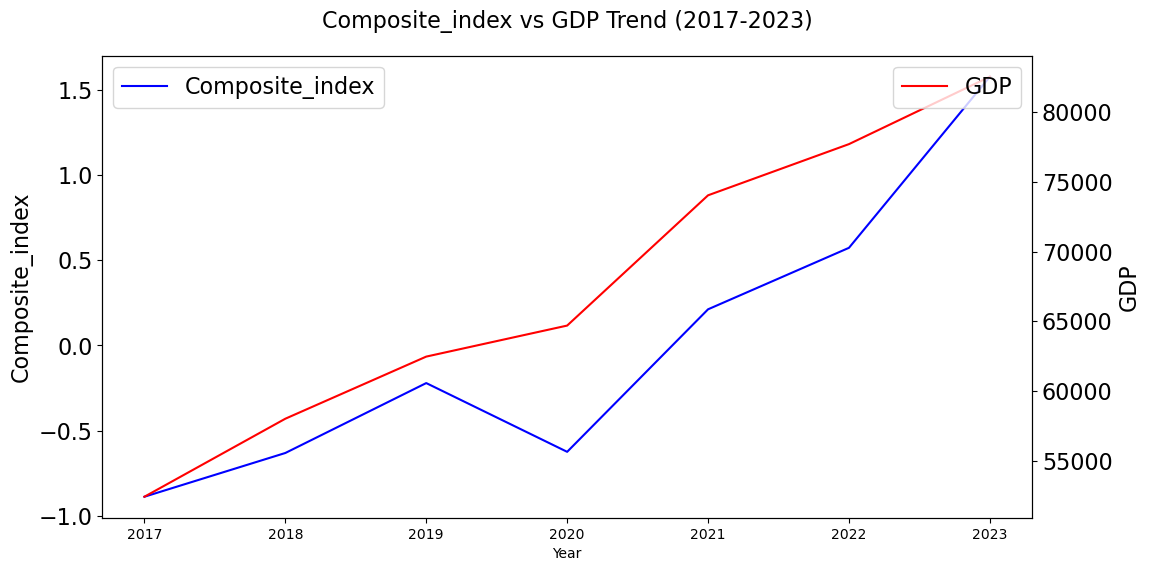

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# 可视化综合指数与GDP关系
plt.figure(figsize=(12, 6))

# 绘制综合指数（左侧纵轴）
ax1 = sns.lineplot(x=full_df.index, y='Composite_Index', data=full_df, color='blue', label='Composite_index')
ax1.set_ylabel('Composite_index', fontsize=16)  # 左侧纵轴标签
ax1.tick_params(axis='y', labelsize=16)  # 左侧纵轴刻度字体大小

# 绘制GDP（右侧纵轴）
ax2 = plt.twinx()
sns.lineplot(x=full_df.index, y='GDP', data=full_df, color='red', label='GDP', ax=ax2)
ax2.set_ylabel('GDP', fontsize=16)  # 右侧纵轴标签
ax2.tick_params(axis='y', labelsize=16)  # 右侧纵轴刻度字体大小

# 添加图例
ax1.legend(loc='upper left', fontsize=16)  # 左侧图例
ax2.legend(loc='upper right', fontsize=16)  # 右侧图例

# 添加标题
plt.title("Composite_index vs GDP Trend (2017-2023)", fontsize=16, pad=20)

# 显示图表
plt.show()

In [64]:
import statsmodels.api as sm

# 综合指数回归分析
X = sm.add_constant(full_df['Composite_Index'])
y = full_df['GDP']
model = sm.OLS(y, X).fit()
print(model.summary())



                            OLS Regression Results                            
Dep. Variable:                    GDP   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     33.97
Date:                Fri, 14 Feb 2025   Prob (F-statistic):            0.00210
Time:                        13:18:23   Log-Likelihood:                -67.342
No. Observations:                   7   AIC:                             138.7
Df Residuals:                       5   BIC:                             138.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            6.741e+04   1630.396     

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [65]:
# 二级指数回归分析
X_multi = sm.add_constant(full_df[['Urban_Rural_Index', 'Human_Capital_Index']])
model_multi = sm.OLS(y, X_multi).fit()
print(model_multi.summary())



                            OLS Regression Results                            
Dep. Variable:                    GDP   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     46.37
Date:                Fri, 14 Feb 2025   Prob (F-statistic):            0.00171
Time:                        13:18:25   Log-Likelihood:                -63.378
No. Observations:                   7   AIC:                             132.8
Df Residuals:                       4   BIC:                             132.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                6.741e+04   1

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [66]:
# 分层指标回归分析
X_multi3 = sm.add_constant(full_df[['Participation_Opportunities_Index','Benefit_Content_Index','Allowable_Differences_Index',
                                    'Aesthetic_Enhancement_Index','Innovation_Enhancement_Index','Cohesion_Enhancement_Index']])
model_multi3 = sm.OLS(y, X_multi3).fit()
print(model_multi3.summary())

                            OLS Regression Results                            
Dep. Variable:                    GDP   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Fri, 14 Feb 2025   Prob (F-statistic):                nan
Time:                        13:18:28   Log-Likelihood:                 143.14
No. Observations:                   7   AIC:                            -272.3
Df Residuals:                       0   BIC:                            -272.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1794: RuntimeWarning: divide by zero encountered in divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1794: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid


In [60]:
# 平稳性检验
def adf_test(series):
    result = adfuller(series)
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')

print("GDP Stationarity Test:")
adf_test(full_df['GDP'])
print("\nComposite Index Stationarity Test:")
adf_test(full_df['Composite_Index'])

# 格兰杰因果检验
granger_df = full_df[['Composite_Index', 'GDP']].dropna()
granger_test = grangercausalitytests(granger_df, maxlag=1)

GDP Stationarity Test:
ADF Statistic: 0.15500689045851107
p-value: 0.9696221129635638

Composite Index Stationarity Test:
ADF Statistic: 1.2086831300610903
p-value: 0.9960453297177693

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.1185  , p=0.2415  , df_denom=3, df_num=1
ssr based chi2 test:   chi2=4.2371  , p=0.0395  , df=1
likelihood ratio test: chi2=3.2055  , p=0.0734  , df=1
parameter F test:         F=2.1185  , p=0.2415  , df_denom=3, df_num=1


In [68]:
full_df.to_csv('1.csv')

In [73]:
import numpy as np
import pandas as pd

# 示例数据
data = {
    'GDP': [52403.13, 58002.84, 62462, 64689.06, 74040.78, 77715.36, 82553.2],
    'Urban_Rural_Index': [-0.412098628, -0.296663899, -0.097019277, -0.227473007, 0.24153938769367078, 0.277419672, 0.5142957514252551],
    'Human_Capital_Index': [-0.475030867, -0.333912418, -0.123437703, -0.396293768, -0.029242515, 0.2955549376493154, 1.0623623326158236],
    'Composite_Index': [-0.887129494, -0.630576317, -0.220456981, -0.623766775, 0.21229687286641946, 0.5729746098604395, 1.5766580840410789],
    'Participation_Opportunities_Index': [-0.141895272, -0.115276831, -0.090876593, -0.10862222, 0.1257530777498926, 0.15496681674262675, 0.1759510210608701],
    'Benefit_Content_Index': [-0.054152009, -0.037876695, -0.009960205, -0.01675787, 0.023232501902159246, 0.037595536079590604, 0.057918741],
    'Allowable_Differences_Index': [-0.216051347, -0.143510373, 0.003817521, -0.102092917, 0.092553808, 0.084857319, 0.28042598946230646],
    'Aesthetic_Enhancement_Index': [0.023153461122730038, 0.052208032, 0.092601191, -0.142090628, 0.021112878767994975, -0.020197678, -0.026787257],
    'Innovation_Enhancement_Index': [-0.166731396, -0.126792475, -0.047767101, 0.002080093, 0.069464333, 0.083183662, 0.1865628836775663],
    'Cohesion_Enhancement_Index': [-0.331452931, -0.259327974, -0.168271794, -0.256283233, -0.119819726, 0.23256895315354886, 0.9025867055962826]
}

# 创建 DataFrame
df = pd.DataFrame(data)

# 检查数据中是否存在缺失值
if df.isnull().values.any():
    # 填充缺失值，这里以均值填充为例
    df.fillna(df.mean(), inplace=True)

# 检查数据类型是否一致
if not np.issubdtype(df.values.dtype, np.floating):
    # 转换为浮点数类型
    df = df.astype(float)

# 无量纲化处理函数
def dimensionless_processing(df):
    """
    对数据进行无量纲化处理，采用极差标准化方法。
    :param df: 待处理的数据框
    :return: 无量纲化后的数据框
    """
    return (df - df.min()) / (df.max() - df.min())

# 计算灰色关联度的函数
def grey_relation_analysis(df, reference_index=0, p=0.5):
    """
    计算各指标与参考指标的灰色关联度。
    :param df: 待分析的数据框
    :param reference_index: 参考指标的列索引，默认为0
    :param p: 分辨系数，取值范围为0~1，默认为0.5
    :return: 各指标与参考指标的灰色关联度
    """
    # 无量纲化处理
    df_normalized = dimensionless_processing(df)
    
    # 获取参考序列
    reference_series = df_normalized.iloc[:, reference_index]
    
    # 计算各比较序列与参考序列的绝对差
    diff_matrix = np.abs(df_normalized - reference_series)
    
    # 计算最大差和最小差
    max_diff = diff_matrix.max().max()
    min_diff = diff_matrix.min().min()
    
    # 计算关联系数矩阵
    relation_matrix = (min_diff + p * max_diff) / (diff_matrix + p * max_diff)
    
    # 计算平均关联系数
    mean_relation = relation_matrix.mean(axis=0)
    
    return mean_relation

# 进行灰色关联度分析，计算各指标与 GDP 的灰色关联度
gdp_index = df.columns.get_loc('GDP')
grey_relation = grey_relation_analysis(df, reference_index=gdp_index)

# 输出结果
for index, value in grey_relation.items():
    print(f"{df.columns[index]} 与 GDP 的灰色关联度为：{value:.4f}")


GDP 与 GDP 的灰色关联度为：nan
Urban_Rural_Index 与 GDP 的灰色关联度为：nan
Human_Capital_Index 与 GDP 的灰色关联度为：nan
Composite_Index 与 GDP 的灰色关联度为：nan
Participation_Opportunities_Index 与 GDP 的灰色关联度为：nan
Benefit_Content_Index 与 GDP 的灰色关联度为：nan
Allowable_Differences_Index 与 GDP 的灰色关联度为：nan


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

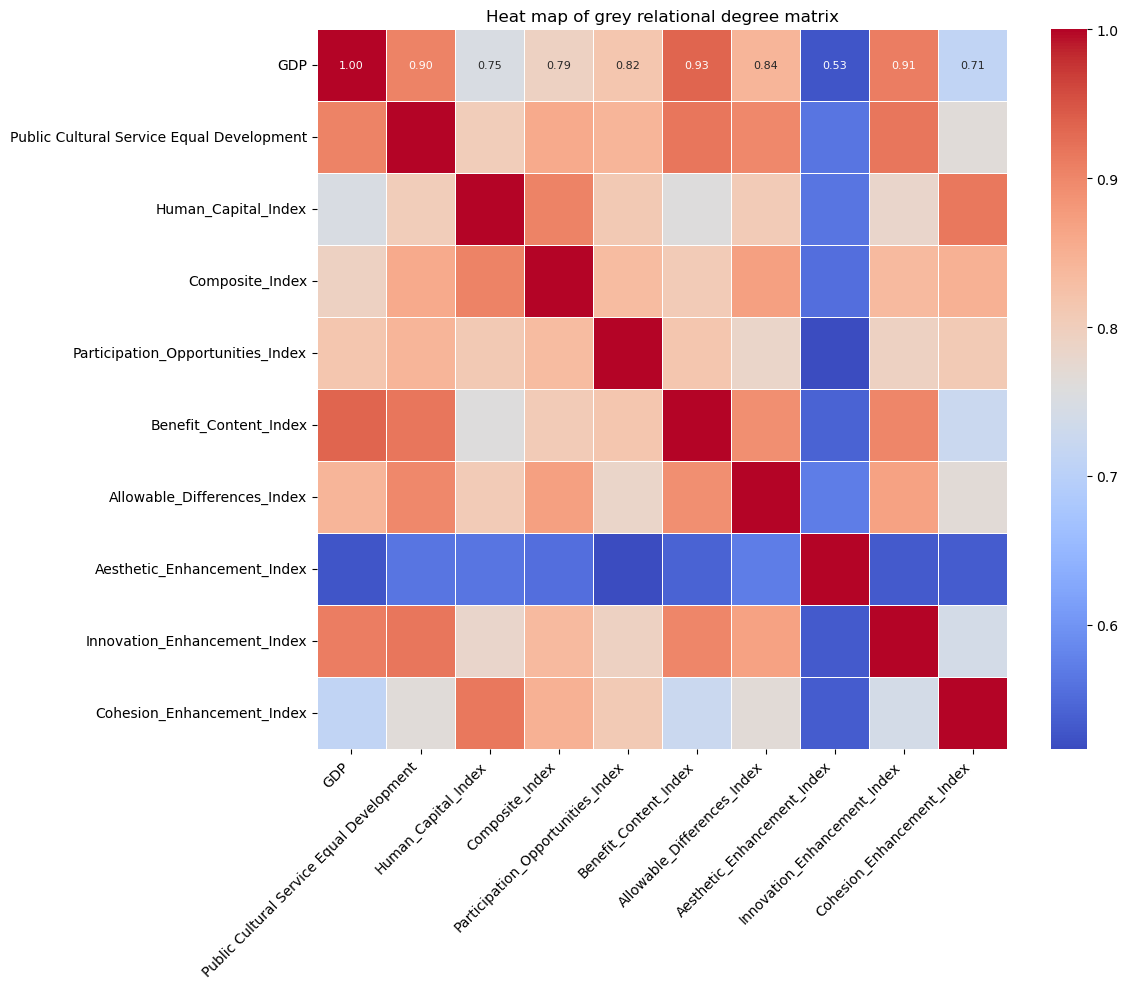

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 原始数据
data = {
    'GDP': [52403.13, 58002.84, 62462, 64689.06, 74040.78, 77715.36, 82553.2],
    'Public Cultural Service Equal Development': [-0.412098628, -0.296663899, -0.097019277, -0.227473007, 0.24153938769367078, 0.277419672, 0.5142957514252551],
    'Human_Capital_Index': [-0.475030867, -0.333912418, -0.123437703, -0.396293768, -0.029242515, 0.2955549376493154, 1.0623623326158236],
    'Composite_Index': [-0.887129494, -0.630576317, -0.220456981, -0.623766775, 0.21229687286641946, 0.5729746098604395, 1.5766580840410789],
    'Participation_Opportunities_Index': [-0.141895272, -0.115276831, -0.090876593, -0.10862222, 0.1257530777498926, 0.15496681674262675, 0.1759510210608701],
    'Benefit_Content_Index': [-0.054152009, -0.037876695, -0.009960205, -0.01675787, 0.023232501902159246, 0.037595536079590604, 0.057918741],
    'Allowable_Differences_Index': [-0.216051347, -0.143510373, 0.003817521, -0.102092917, 0.092553808, 0.084857319, 0.28042598946230646],
    'Aesthetic_Enhancement_Index': [0.023153461122730038, 0.052208032, 0.092601191, -0.142090628, 0.021112878767994975, -0.020197678, -0.026787257],
    'Innovation_Enhancement_Index': [-0.166731396, -0.126792475, -0.047767101, 0.002080093, 0.069464333, 0.083183662, 0.1865628836775663],
    'Cohesion_Enhancement_Index': [-0.331452931, -0.259327974, -0.168271794, -0.256283233, -0.119819726, 0.23256895315354886, 0.9025867055962826]
}

df = pd.DataFrame(data)

def grey_relation_matrix(df, rho=0.5):
    """
    计算所有指标两两之间的灰色关联度矩阵
    :param df: 原始数据DataFrame
    :param rho: 分辨系数，默认0.5
    :return: 灰色关联度矩阵
    """
    # 数据标准化
    normalized_df = df.apply(lambda x: (x - x.min()) / (x.max() - x.min()))
    
    # 初始化矩阵
    cols = normalized_df.columns
    n = len(cols)
    matrix = pd.DataFrame(np.zeros((n, n)), columns=cols, index=cols)
    
    # 计算全局最小差和最大差
    deltas = []
    for i in range(n):
        for j in range(i+1, n):
            delta = (normalized_df.iloc[:, i] - normalized_df.iloc[:, j]).abs()
            deltas.append(delta)
    all_deltas = pd.concat(deltas, axis=1)
    min_delta = all_deltas.min().min()
    max_delta = all_deltas.max().max()
    
    # 计算关联度
    for i in range(n):
        for j in range(n):
            if i == j:
                matrix.iloc[i, j] = 1.0  # 对角线为完全相关
            else:
                delta = (normalized_df.iloc[:, i] - normalized_df.iloc[:, j]).abs()
                coefficients = (min_delta + rho * max_delta) / (delta + rho * max_delta)
                matrix.iloc[i, j] = coefficients.mean()
    
    return matrix

# 生成关联矩阵
relation_matrix = grey_relation_matrix(df)

# 绘制热力图
plt.figure(figsize=(12, 10))
sns.heatmap(relation_matrix, annot=True, fmt=".2f", cmap='coolwarm', 
            linewidths=0.5, annot_kws={'size':8})
plt.title("Heat map of grey relational degree matrix")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

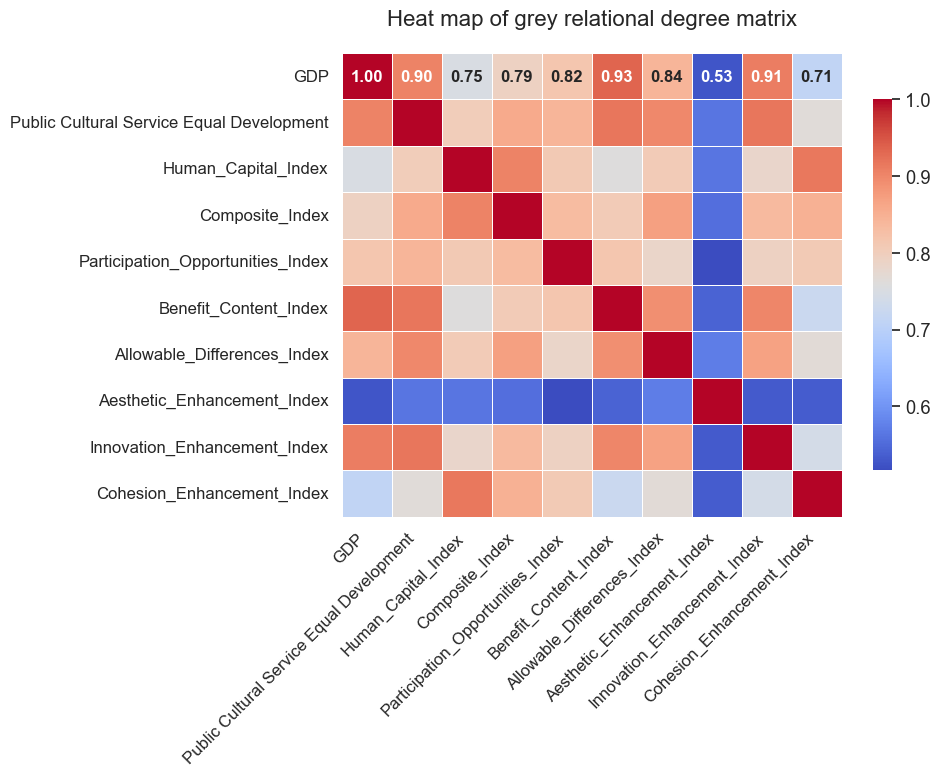

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 原始数据
data = {
    'GDP': [52403.13, 58002.84, 62462, 64689.06, 74040.78, 77715.36, 82553.2],
    'Public Cultural Service Equal Development': [-0.412098628, -0.296663899, -0.097019277, -0.227473007, 0.24153938769367078, 0.277419672, 0.5142957514252551],
    'Human_Capital_Index': [-0.475030867, -0.333912418, -0.123437703, -0.396293768, -0.029242515, 0.2955549376493154, 1.0623623326158236],
    'Composite_Index': [-0.887129494, -0.630576317, -0.220456981, -0.623766775, 0.21229687286641946, 0.5729746098604395, 1.5766580840410789],
    'Participation_Opportunities_Index': [-0.141895272, -0.115276831, -0.090876593, -0.10862222, 0.1257530777498926, 0.15496681674262675, 0.1759510210608701],
    'Benefit_Content_Index': [-0.054152009, -0.037876695, -0.009960205, -0.01675787, 0.023232501902159246, 0.037595536079590604, 0.057918741],
    'Allowable_Differences_Index': [-0.216051347, -0.143510373, 0.003817521, -0.102092917, 0.092553808, 0.084857319, 0.28042598946230646],
    'Aesthetic_Enhancement_Index': [0.023153461122730038, 0.052208032, 0.092601191, -0.142090628, 0.021112878767994975, -0.020197678, -0.026787257],
    'Innovation_Enhancement_Index': [-0.166731396, -0.126792475, -0.047767101, 0.002080093, 0.069464333, 0.083183662, 0.1865628836775663],
    'Cohesion_Enhancement_Index': [-0.331452931, -0.259327974, -0.168271794, -0.256283233, -0.119819726, 0.23256895315354886, 0.9025867055962826]
}

df = pd.DataFrame(data)

def grey_relation_matrix(df, rho=0.5):
    """
    计算所有指标两两之间的灰色关联度矩阵
    :param df: 原始数据DataFrame
    :param rho: 分辨系数，默认0.5
    :return: 灰色关联度矩阵
    """
    # 数据标准化
    normalized_df = df.apply(lambda x: (x - x.min()) / (x.max() - x.min()))
    
    # 初始化矩阵
    cols = normalized_df.columns
    n = len(cols)
    matrix = pd.DataFrame(np.zeros((n, n)), columns=cols, index=cols)
    
    # 计算全局最小差和最大差
    deltas = []
    for i in range(n):
        for j in range(i+1, n):
            delta = (normalized_df.iloc[:, i] - normalized_df.iloc[:, j]).abs()
            deltas.append(delta)
    all_deltas = pd.concat(deltas, axis=1)
    min_delta = all_deltas.min().min()
    max_delta = all_deltas.max().max()
    
    # 计算关联度
    for i in range(n):
        for j in range(n):
            if i == j:
                matrix.iloc[i, j] = 1.0  # 对角线为完全相关
            else:
                delta = (normalized_df.iloc[:, i] - normalized_df.iloc[:, j]).abs()
                coefficients = (min_delta + rho * max_delta) / (delta + rho * max_delta)
                matrix.iloc[i, j] = coefficients.mean()
    
    return matrix

# 生成关联矩阵
relation_matrix = grey_relation_matrix(df)

# 设置绘图风格
sns.set(style="white", font_scale=1.2)  # 调整字体大小
plt.figure(figsize=(10, 8))  # 调整画布大小

# 绘制热力图
heatmap = sns.heatmap(
    relation_matrix, 
    annot=True, 
    fmt=".2f", 
    cmap='coolwarm', 
    linewidths=0.5, 
    annot_kws={'size': 12, 'weight': 'bold'},  # 调整标注字体大小和粗细
    cbar_kws={'shrink': 0.8}  # 调整颜色条大小
)

# 调整标题和标签
plt.title("Heat map of grey relational degree matrix", fontsize=16, pad=20)  # 调整标题字体大小和间距
plt.xticks(rotation=45, ha='right', fontsize=12)  # 调整x轴标签字体大小和旋转角度
plt.yticks(fontsize=12)  # 调整y轴标签字体大小

# 优化布局
plt.tight_layout()

# 保存高清图像（可选）
plt.savefig("grey_relation_heatmap.png", dpi=300, bbox_inches='tight')

# 显示图像
plt.show()

In [18]:
import pandas as pd
import numpy as np

# 原始数据
data = {
    'GDP': [52403.13, 58002.84, 62462, 64689.06, 74040.78, 77715.36, 82553.2],
    'Urban_Rural_Index': [-0.412098628, -0.296663899, -0.097019277, -0.227473007, 0.24153938769367078, 0.277419672, 0.5142957514252551],
    'Human_Capital_Index': [-0.475030867, -0.333912418, -0.123437703, -0.396293768, -0.029242515, 0.2955549376493154, 1.0623623326158236],
    'Composite_Index': [-0.887129494, -0.630576317, -0.220456981, -0.623766775, 0.21229687286641946, 0.5729746098604395, 1.5766580840410789],
    'Participation_Opportunities_Index': [-0.141895272, -0.115276831, -0.090876593, -0.10862222, 0.1257530777498926, 0.15496681674262675, 0.1759510210608701],
    'Benefit_Content_Index': [-0.054152009, -0.037876695, -0.009960205, -0.01675787, 0.023232501902159246, 0.037595536079590604, 0.057918741],
    'Allowable_Differences_Index': [-0.216051347, -0.143510373, 0.003817521, -0.102092917, 0.092553808, 0.084857319, 0.28042598946230646],
    'Aesthetic_Enhancement_Index': [0.023153461122730038, 0.052208032, 0.092601191, -0.142090628, 0.021112878767994975, -0.020197678, -0.026787257],
    'Innovation_Enhancement_Index': [-0.166731396, -0.126792475, -0.047767101, 0.002080093, 0.069464333, 0.083183662, 0.1865628836775663],
    'Cohesion_Enhancement_Index': [-0.331452931, -0.259327974, -0.168271794, -0.256283233, -0.119819726, 0.23256895315354886, 0.9025867055962826]
}

df = pd.DataFrame(data)

def grey_relation_analysis(df, target_col, rho=0.5):
    """
    执行灰色关联分析
    :param df: 包含所有序列的DataFrame
    :param target_col: 目标列名（参考序列）
    :param rho: 分辨系数，默认0.5
    :return: 各指标灰色关联度排序
    """
    # 数据标准化（min-max归一化）
    normalized_df = df.apply(lambda x: (x - x.min()) / (x.max() - x.min()))
    
    # 提取参考序列和比较序列
    ref_series = normalized_df[target_col]
    comp_series = normalized_df.drop(columns=[target_col])
    
    # 计算绝对差
    delta = comp_series.sub(ref_series, axis=0).abs()
    
    # 计算全局最小差和最大差
    min_delta = delta.min().min()
    max_delta = delta.max().max()
    
    # 计算关联系数
    coefficients = (min_delta + rho * max_delta) / (delta + rho * max_delta)
    
    # 计算关联度并排序
    return coefficients.mean().sort_values(ascending=False)

# 执行分析
result = grey_relation_analysis(df, 'GDP')
print("GDP与其他指标的灰色关联度排序：")
print(result)

GDP与其他指标的灰色关联度排序：
Benefit_Content_Index                0.921252
Innovation_Enhancement_Index         0.894039
Urban_Rural_Index                    0.888031
Allowable_Differences_Index          0.816165
Participation_Opportunities_Index    0.787245
Composite_Index                      0.764541
Human_Capital_Index                  0.716884
Cohesion_Enhancement_Index           0.677956
Aesthetic_Enhancement_Index          0.481403
dtype: float64
